In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Load datasets
sensex = pd.read_excel(r"C:\Users\Sandesh\Project\NMIMS Project\BSE Sensex Data.xlsx")
bonds = pd.read_excel(r"C:\Users\Sandesh\Project\NMIMS Project\India Bond Yeild Data.xlsx")
nifty_50 = pd.read_excel(r"C:\Users\Sandesh\Project\NMIMS Project\Nifty 50 Data.xlsx") 
gold = pd.read_excel(r"C:\Users\Sandesh\Project\NMIMS Project\Gold Rates Data.xlsx")
USD_INR = pd.read_excel(r"C:\Users\Sandesh\Project\NMIMS Project\USD_INR Data.xlsx")

# Check the structure of the datasets
print("Sensex Data:")
print(sensex.head())
print("\nBonds Data:")
print(bonds.head())
print("\nNifty 50 Data:")
print(nifty_50.head())
print("\nGold Data:")
print(gold.head())
print("\nUSD_INR Data:")
print(USD_INR.head())

Sensex Data:
        Date     Price      Open      High       Low  Change %
0 2024-03-01  73651.35  72606.31  74245.17  71674.42    0.0159
1 2024-02-01  72500.30  71998.78  73413.93  70809.84    0.0104
2 2024-01-01  71752.11  72218.39  73427.59  70001.60   -0.0068
3 2023-12-01  72240.26  67181.15  72484.34  67149.07    0.0784
4 2023-11-01  66988.44  63829.87  67069.89  63550.46    0.0487

Bonds Data:
        Date  Price   Open   High    Low  Change %
0 2024-03-01  7.052  7.052  7.052  7.052   -0.0037
1 2024-02-01  7.078  7.078  7.078  7.078   -0.0092
2 2024-01-01  7.144  7.207  7.239  7.134   -0.0045
3 2023-12-01  7.176  7.293  7.298  7.147   -0.0142
4 2023-11-01  7.279  7.376  7.376  7.194   -0.0098

Nifty 50 Data:
        Date     Price      Open      High      Low  Change %
0 2024-03-01  22326.90  22048.30  22526.60  21710.2    0.0157
1 2024-02-01  21982.80  21780.65  22297.50  21530.2    0.0118
2 2024-01-01  21725.70  21727.75  22124.15  21137.2   -0.0003
3 2023-12-01  21731.40  20

In [12]:
# Function to calculate daily returns
def calculate_daily_returns(df):
    df['Return'] = df['Price'].pct_change()
    return df

# Apply the function to all datasets
sensex = calculate_daily_returns(sensex)
bonds = calculate_daily_returns(bonds)
nifty_50 = calculate_daily_returns(nifty_50)
gold = calculate_daily_returns(gold)
USD_INR = calculate_daily_returns(USD_INR)

# Combine all returns into a single DataFrame
returns = pd.DataFrame({
    'Sensex': sensex['Return'],
    'Bonds': bonds['Return'],
    'Nifty 50': nifty_50['Return'],
    'Gold': gold['Return'],
    'USD_INR': USD_INR['Return']
})

# Drop NaN values
returns = returns.dropna()

print("Daily Returns Data:")
print(returns.head())

Daily Returns Data:
     Sensex     Bonds  Nifty 50      Gold   USD_INR
1 -0.015628  0.003687 -0.015412 -0.077410 -0.005399
2 -0.010320  0.009325 -0.011696  0.001314  0.002352
3  0.006803  0.004479  0.000262  0.006999  0.001143
4 -0.072699  0.014353 -0.073546 -0.016266  0.002007
5 -0.046478  0.009891 -0.052329 -0.021491 -0.001212


Covariance Matrix:
             Sensex     Bonds  Nifty 50      Gold   USD_INR
Sensex    0.002405  0.000108  0.002412  0.000024 -0.000365
Bonds     0.000108  0.000657  0.000106 -0.000053  0.000049
Nifty 50  0.002412  0.000106  0.002435  0.000026 -0.000371
Gold      0.000024 -0.000053  0.000026  0.001530 -0.000121
USD_INR  -0.000365  0.000049 -0.000371 -0.000121  0.000220


Volatility:
 Sensex      0.049039
Bonds       0.025627
Nifty 50    0.049342
Gold        0.039112
USD_INR     0.014819
dtype: float64


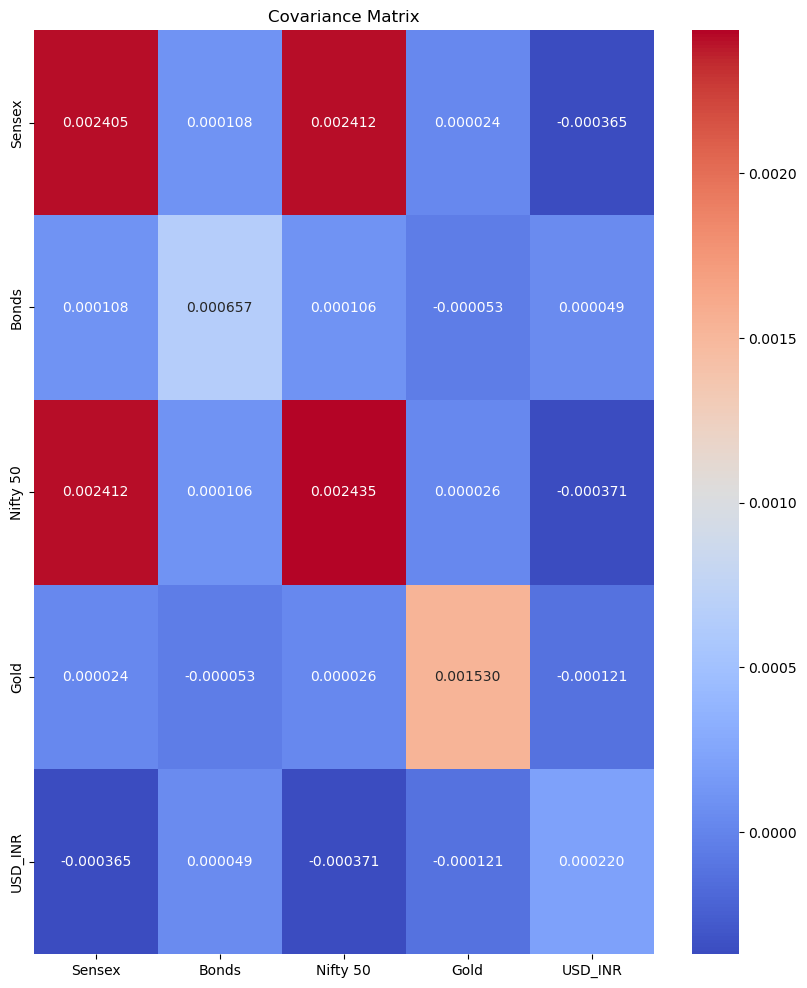

In [13]:
# Calculate the covariance matrix
cov_matrix = returns.cov()

# Calculate volatility (standard deviation of returns)
volatility = returns.std()

# Display covariance matrix and volatility
print("Covariance Matrix:\n", cov_matrix)
print('\n')
print("Volatility:\n", volatility)

# Plot the covariance matrix for better visualization
plt.figure(figsize=(10,12))
sns.heatmap(cov_matrix, annot=True, cmap="coolwarm", fmt=".6f")
plt.title('Covariance Matrix')
plt.show()

In [14]:
def gram_schmidt_process(matrix):
    matrix = matrix.values.T  # Convert DataFrame to numpy matrix and transpose so columns represent assets
    orthogonalized = np.zeros_like(matrix)
    for i in range(matrix.shape[0]):
        vec = matrix[i]
        for j in range(i):
            vec -= np.dot(orthogonalized[j], matrix[i]) * orthogonalized[j]
        orthogonalized[i] = vec / np.linalg.norm(vec)
    return orthogonalized.T  # Transpose back to original format

In [15]:
# Applying Gram-Schmidt process directly to the returns matrix
gs_matrix = gram_schmidt_process(returns)

In [16]:
# Verify the output by checking covariance
gs_cov_matrix = np.cov(gs_matrix, rowvar=False)
gs_cov_matrix = pd.DataFrame(gs_cov_matrix,columns=['Sensex','Bonds','Nifty 50', 'Gold', 'USD_INR'])
gs_cov_matrix

,Sensex,Bonds,Nifty 50,Gold,USD_INR
0,0.008208,0.000149,-0.000028,-0.000128,-0.000498
1,0.000149,0.008392,0.000016,0.000071,0.000277
2,-0.000028,0.000016,0.008472,-0.000014,-0.000053
3,-0.000128,0.000071,-0.000014,0.008413,-0.000238
4,-0.000498,0.000277,-0.000053,-0.000238,0.007546


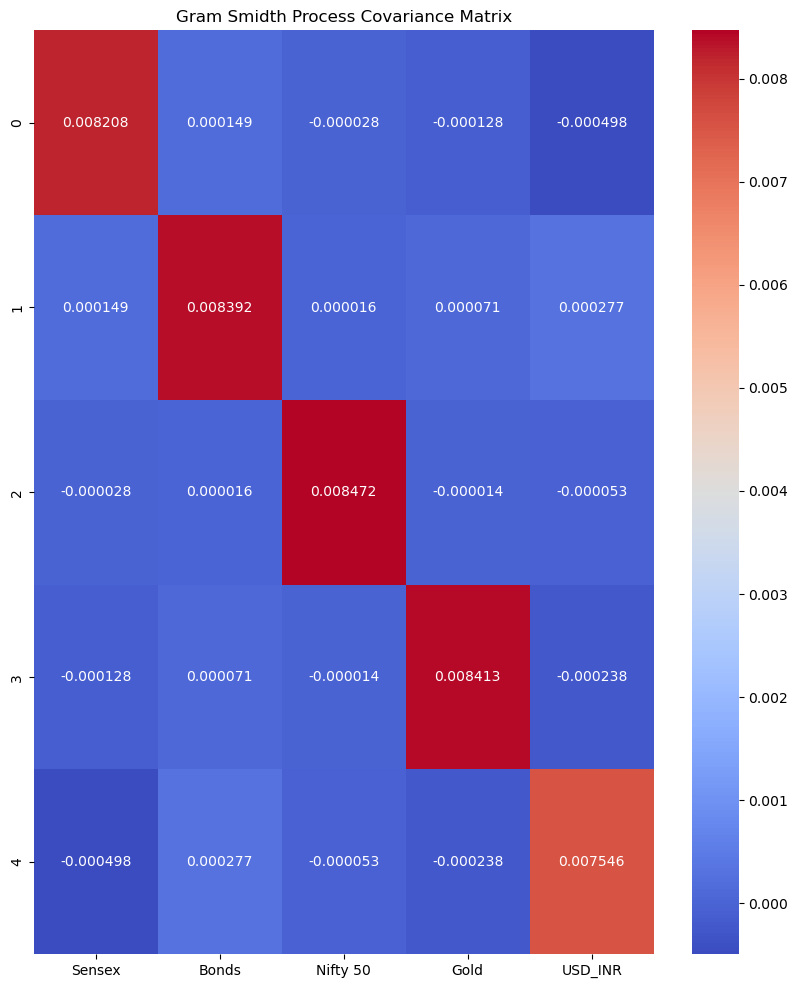

In [17]:
plt.figure(figsize=(10,12))
sns.heatmap(gs_cov_matrix, annot=True, cmap="coolwarm", fmt=".6f")
plt.title('Gram Smidth Process Covariance Matrix')
plt.show()

In [29]:
def gsop_objective(weights):
    # Calculate portfolio variance using orthogonalized covariance matrix
    portfolio_var = np.dot(weights.T, np.dot(gs_cov_matrix, weights))
    marginal_contrib = np.dot(gs_cov_matrix, weights) / np.sqrt(portfolio_var)
    risk_contrib = weights * marginal_contrib  # Risk contribution from each component
    target_contrib = portfolio_var / len(weights)  # Target is equal risk contribution
    return np.sum((risk_contrib - target_contrib) ** 2)
    return portfolio_var

In [32]:
print('portfolio variance:',portfolio_var)
print('Portfolio Volatility:',np.sqrt(portfolio_var))

portfolio variance: 0.0016055622155915156
Portfolio Volatility: 0.04006946737344428


In [24]:
asset_names = returns.columns  # This gets the column names from the 'returns' DataFrame
initial_weights = np.array([1 / len(asset_names)] * len(asset_names))
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})
bounds = [(0, 1) for _ in asset_names]

In [25]:
gsop_result = minimize(gsop_objective, initial_weights, bounds=bounds, constraints=constraints)
gsop_weights = gsop_result.x

In [26]:
gsop_risk = np.sqrt(np.dot(gsop_weights.T, np.dot(gs_cov_matrix, gsop_weights)))
print("Gram-Schmidt Orthonormalization Portfolio Risk:", gsop_risk)
print("Gram-Schmidt Orthonormalization Portfolio Weight:", gsop_weights)

Gram-Schmidt Orthonormalization Portfolio Risk: 0.04006946737344428
Gram-Schmidt Orthonormalization Portfolio Weight: [0.2 0.2 0.2 0.2 0.2]


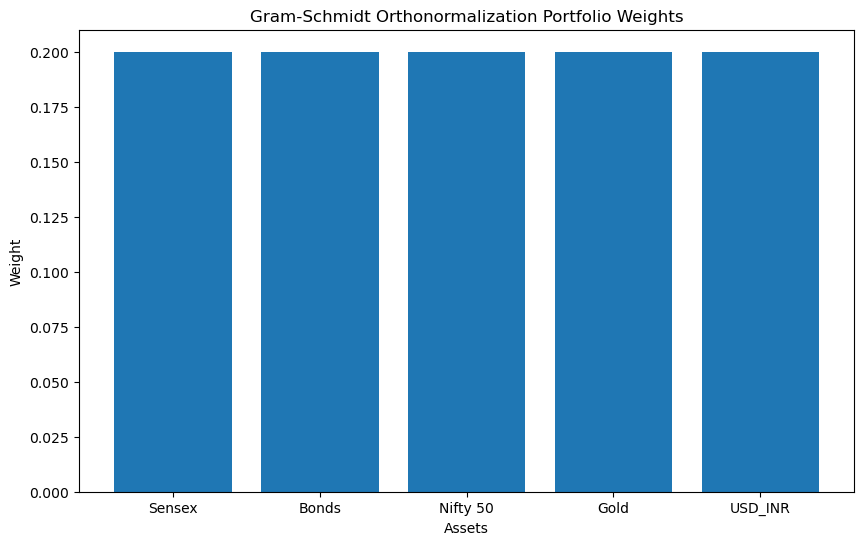

In [27]:
plt.figure(figsize=(10, 6))
plt.bar(asset_names, gsop_weights)
plt.title("Gram-Schmidt Orthonormalization Portfolio Weights")
plt.xlabel("Assets")
plt.ylabel("Weight")
plt.show()

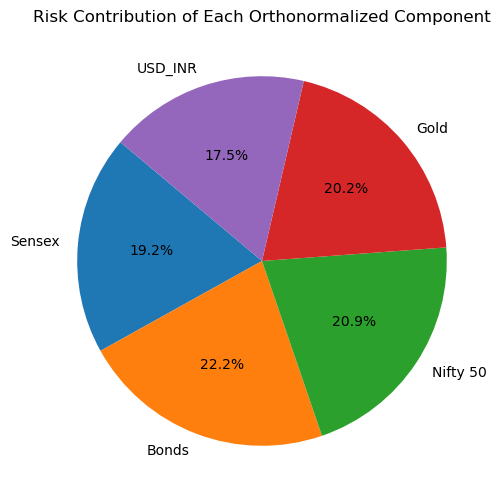

In [28]:
portfolio_var = np.dot(gsop_weights.T, np.dot(gs_cov_matrix, gsop_weights))
marginal_contrib = np.dot(gs_cov_matrix, gsop_weights) / np.sqrt(portfolio_var)
risk_contrib = gsop_weights * marginal_contrib  # Individual risk contributions

plt.figure(figsize=(10, 6))
plt.pie(risk_contrib, labels=asset_names, autopct='%1.1f%%', startangle=140)
plt.title("Risk Contribution of Each Orthonormalized Component")
plt.show()